### Install and Import Libraries

In [0]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Enable inline plots
%matplotlib inline


### Load Data

In [0]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Prepare Data

In [0]:
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert standardized data to a DataFrame for convenience
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Dimensionality Reduction - PCA

In [0]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Convert PCA results to a DataFrame
data_pca_df = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
data_pca_df.head()


Explained Variance Ratio: [0.72962445 0.22850762]


,Principal Component 1,Principal Component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


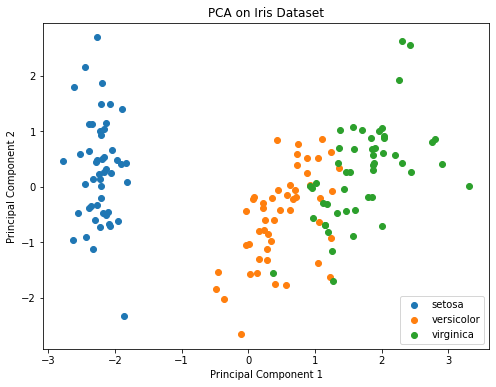

In [0]:
# Add the target variable for coloring
data_pca_df['Target'] = iris.target

# Plot the PCA results
plt.figure(figsize=(8, 6))
for target in np.unique(iris.target):
    subset = data_pca_df[data_pca_df['Target'] == target]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=iris.target_names[target])
    
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


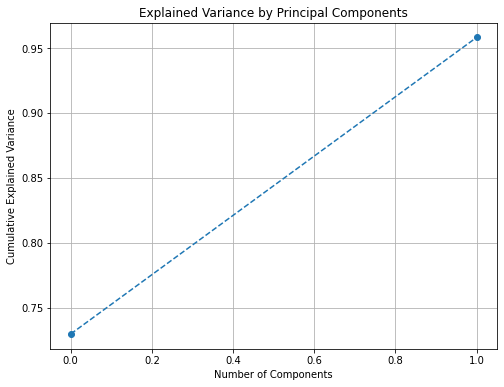

In [0]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [0]:
# Clean column names in Pandas DataFrame
data_pca_df.columns = [col.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_") for col in data_pca_df.columns]

# Display cleaned column names
print("Cleaned column names:", data_pca_df.columns)


Cleaned column names: Index(['Principal_Component_1', 'Principal_Component_2', 'Target'], dtype='object')


In [0]:
# Convert the cleaned Pandas DataFrame to a PySpark DataFrame
data_pca_spark = spark.createDataFrame(data_pca_df)

# Save the PySpark DataFrame to a Delta table
pca_table_name = "iris_pca_results"
data_pca_spark.write.format("delta").mode("overwrite").saveAsTable(pca_table_name)

print(f"PCA results saved to Delta table: {pca_table_name}")

PCA results saved to Delta table: iris_pca_results


In [0]:
# Query the saved Delta table
pca_results = spark.table("iris_pca_results")
pca_results.show()

+---------------------+---------------------+------+
|Principal_Component_1|Principal_Component_2|Target|
+---------------------+---------------------+------+
|  -2.2647028088075967|  0.48002659652098845|     0|
|  -2.0809611519657687|  -0.6741335566053533|     0|
|   -2.364229053890301| -0.34190802388467606|     0|
|  -2.2993842170427095|  -0.5973945076746758|     0|
|  -2.3898421663138456|   0.6468353829020274|     0|
|  -2.0756309481765123|   1.4891775233211668|     0|
|   -2.444028835134154|  0.04764419763001429|     0|
|   -2.232847158872016|  0.22314807268959178|     0|
|   -2.334640477907622|  -1.1153276754616666|     0|
|  -2.1843281749339427|  -0.4690135614023758|     0|
|  -2.1663101007013226|   1.0436906530538599|     0|
|  -2.3261308664426994|  0.13307833523923163|     0|
|    -2.21845089882241|  -0.7286761653165709|     0|
|   -2.633100695765229|  -0.9615067291701631|     0|
|    -2.19874060326669|   1.8600571132939314|     0|
|   -2.262214531601021|   2.6862844851105923| 